# Show sentinel 1 test image
This notebook is an example of how to load and plot a Sentinel 1 SLC image. 

In [6]:
using SARProcessing;

## Load sentinel 1 Image

In [9]:
metadata = SARProcessing.Sentinel1MetaData("../test/testData/s1a-iw3-slc-vv-20220918t074921-20220918t074946-045056-056232-006.xml")
metadata.swath.lines_per_burst

1514

In [15]:
metadata.swath.samples_per_burst

24203

In [19]:
burst_number = 7
window = [[(metadata.swath.lines_per_burst*(burst_number-1)+1),
metadata.swath.lines_per_burst*burst_number],[1,metadata.swath.samples_per_burst]]

2-element Vector{Vector{Int64}}:
 [9085, 10598]
 [1, 24203]

In [12]:
SARProcessing.get_burst_start_times(metadata)

9-element Vector{Float64}:
  0.513562
  3.272118
  6.028619
  8.787176
 11.545732
 14.312510999999999
 17.058734
 19.819346
 22.573792

In [13]:
SARProcessing.get_reference_time(metadata)

2022-09-18T07:49:21

In [25]:
slc_path= "../test/testData/largeFiles/S1A_IW_SLC__1SDV_20220918T074920_20220918T074947_045056_056232_62D6.SAFE/measurement/s1a-iw3-slc-vv-20220918t074921-20220918t074946-045056-056232-006.tiff";
complex_image = SARProcessing.load_tiff(slc_path,window);

In [26]:
size(complex_image) == (metadata.swath.lines_per_burst, metadata.swath.samples_per_burst)

true

## Show image
The test image shows Angra do Heroísmo on the Azores. Note that east west is mirrored in the sentinel image

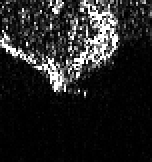

In [46]:
img = SARProcessing.sar2gray(complex_image[1070:1150,11500:4:11800], p_quantile = 0.95)